In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('../Dataset/tesla-stock-price.csv')

df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')
df.set_index('date', inplace=True)

df.head()

data = df['close'].values.reshape(-1, 1)

C:\Users\surbh\AppData\Local\Temp\ipykernel_5240\3417560682.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')
C:\Users\surbh\AppData\Local\Temp\ipykernel_5240\3417560682.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [10]:
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

C:\Users\surbh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.2734
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0186
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0077
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0046
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0029
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0020
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0016
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0017
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0017
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0017
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


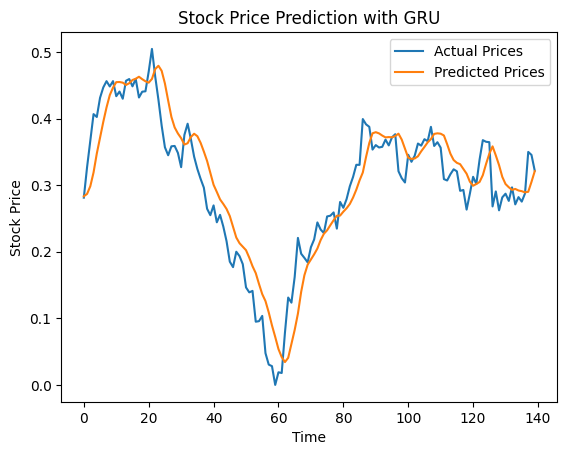

In [11]:
# GRU Model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

predictions = model.predict(X_test)

plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Stock Price Prediction with GRU')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('../Images/gru_stock_prediction.png')